# CLASSIFICATION PROBLEMS

We know to deal with problems in which we need to predict a numerical value, but what about the situation in which the final decision is whether the test need to decide whether a data point falls into discrete categories?

We are facing here with discrete problems, also known as classification problem.


In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn; seaborn.set()

    #================================================Import a dataset
    dataset = pd.read_csv('Part 1 - Data Preprocessing/Data.csv') #name of the dataset
    X = dataset.iloc[:, :-1].values 
    y = dataset.iloc[:, 3].values #modify extrems if necessary


    #==============================================taking care of missing data
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer.fit(X[:, 1:-1])
    X[:, 1:-1] = imputer.transform(X[:, 1:-1])

    #==============================================encoding categorical data
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder

    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder = 'passthrough') #column transformer
    X = np.array(ct.fit_transform(X))

    #=============================================encoding dependent variable
    from sklearn.preprocessing import LabelEncoder
    #procedura analoga a quella sopra con un Booleano creato in luogo di due 
    le = LabelEncoder()
    y = le.fit_transform(y)


    #==============================================splitting into training and test datasets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1)
    #possibly different test_size


    #===============================================feature scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train[:, -1] = sc.fit_transform(X_train[:, -1]) #non si applica alle dummy variable
    X_test[:, -1] = sc.transform(X_test[:, -1])



## 3-1 Logistic regression
We study the probability of each data point of falling into a category, this is the idea at the basis of logistic regression. Logistic regression does that to some extent. it models the probability with a sigmoid function

$$
p = \frac{1}{e^{-y}+1}
$$
where $y$ is also the dependent variable of a linear regression

$$
y = mx +q
$$

then we can solve for $y$ in the first equation and substitute in the second obtaining

$$
\ln(\frac{p}{1-p}) = mx+q
$$

which models the probability $p$ of an event in terms of the independent variable $x$.

In [2]:
from sklearn.linear_model import LogisticRegression

dataset = pd.read_csv('Part 3 - Classification/Section 14 - Logistic Regression/Social_Network_Ads.csv') #name of the dataset
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:,-1].values #modify extrems if necessary

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder = 'passthrough') #column transformer
X = np.array(ct.fit_transform(X))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)
#possibly different test_size

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,2:] = sc.fit_transform(X_train[:,2:]) #do not apply to dummy variables
X_test[:,2:] = sc.transform(X_test[:,2:])

#==================================LOG_REG===============================================
Log_reg = LogisticRegression(solver ='lbfgs', random_state=0).fit(X_test, y_test)

results = Log_reg.predict(X_test)

#=================================CONFUSION MATRIX=========================================

from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, results)

confrontation = np.concatenate((y_test.reshape(len(y_test),1), results.reshape(len(results),1)), axis=1)
#print('Risultati:\n',confrontation)
print('Score of Log_reg:',Log_reg.score(X_test,y_test))
print('Confusion Matrix:\n', cf)

Score of Log_reg: 0.89
Confusion Matrix:
 [[66  2]
 [ 9 23]]


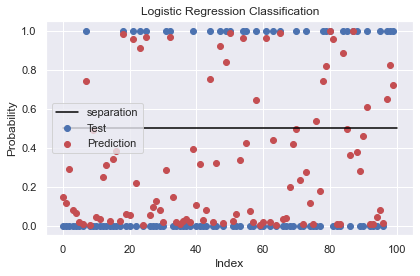

In [3]:
plt.scatter(np.arange(len(confrontation[:,0])), y_test, c='b')
plt.scatter(np.arange(len(confrontation[:,0])), Log_reg.predict_proba(X_test)[:,1], c='r')
plt.plot([0,100],[0.5,0.5], c='black')
plt.legend(['separation','Test','Prediction'])
plt.xlabel('Index')
plt.ylabel('Probability')
plt.title('Logistic Regression Classification')
plt.tight_layout()
plt.savefig('Part 3 - Classification/Section 14 - Logistic Regression/LOG_REG.jpg', dpi=199)

## 3-2 KNN Neighbors

Let's consider a dataset in which we already have two categories separated. We then get a new datapoint and we need to identify whether it falls in one the categories. The idea is that we choose the number $k$ of neighbors to the new point, according to some form of distance (generally eucledian). Then I assign to the new point the category in which i have found the most neighbors.

In [4]:
dataset = pd.read_csv('Part 3 - Classification/Section 15 - K-Nearest Neighbors (K-NN)/Social_Network_Ads.csv') #name of the dataset
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:,-1].values #modify extrems if necessary

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder = 'passthrough') #column transformer
X = np.array(ct.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)
#possibly different test_size

sc = StandardScaler()
X_train[:,2:] = sc.fit_transform(X_train[:,2:]) #do not apply to dummy variables
X_test[:,2:] = sc.transform(X_test[:,2:])

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
results = KNN.predict(X_test)

print(KNN.score(X_test, y_test))
confrontation = np.concatenate((y_test.reshape(len(y_test),1), results.reshape(len(results),1)), axis=1)



0.93


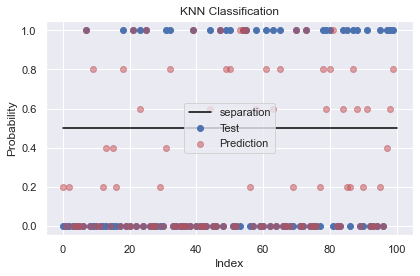

In [5]:
plt.scatter(np.arange(len(confrontation[:,0])), y_test, c='b')
plt.scatter(np.arange(len(confrontation[:,0])), KNN.predict_proba(X_test)[:,1], c='r', alpha=0.5)
plt.plot([0,100],[0.5,0.5], c='black')
plt.legend(['separation','Test','Prediction'])
plt.xlabel('Index')
plt.ylabel('Probability')
plt.title('KNN Classification')
plt.tight_layout()
plt.savefig('Part 3 - Classification/Section 15 - K-Nearest Neighbors (K-NN)/KNN.jpg', dpi=199)

## 3-3 SVM Support Vector Machine
We are presented again we a set of already categorized data and we wante to individuate the best decision boundary between them. SVM searches between the lines that one that has a maximum sum for the distances between itself and the support vectors. The support vectors are the points that actually contribute to the implementation of the algorithm.

The line in the middle (in 2d) is in general called a maximum margin hyperplane.

The special features of SVM is that it does not only considers elements that are already in one category and by example classifies future inputs. SVM takes the element of category  1 that are as close as possible to category 2 and vice versa. And draws the separation maximising the distance between those two elements.


In [6]:
dataset = pd.read_csv('Part 3 - Classification/Section 16 - Support Vector Machine (SVM)/Social_Network_Ads.csv') #name of the dataset
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:,-1].values #modify extrems if necessary

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder = 'passthrough') #column transformer
X = np.array(ct.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)
#possibly different test_size

sc = StandardScaler()
X_train[:,2:] = sc.fit_transform(X_train[:,2:]) #do not apply to dummy variables
X_test[:,2:] = sc.transform(X_test[:,2:])

from sklearn.svm import SVC

SVM = SVC(kernel='linear').fit(X_train, y_train)
results = SVM.predict(X_test)
confrontation = np.concatenate((y_test.reshape(len(y_test),1), results.reshape(len(results),1)), axis=1)

print(SVM.score(X_test, y_test))

0.88


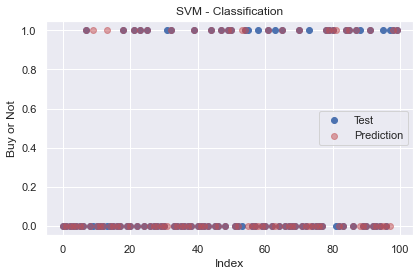

In [7]:
plt.scatter(np.arange(len(confrontation[:,0])), confrontation[:,0])
plt.scatter(np.arange(len(confrontation[:,0])), SVM.predict(X_test), c='r', alpha=0.5 )
plt.xlabel('Index')
plt.ylabel('Buy or Not')
plt.title('SVM - Classification')
plt.legend(['Test','Prediction'])
plt.tight_layout()
plt.savefig('Part 3 - Classification/Section 16 - Support Vector Machine (SVM)/SVM.jpg', dpi=199)

## 3-4 Kernel SVM
What happens when our SVM does not find a separation with a function, aka when the data is not linearly separable? That is where Kernel SVM kicks in.

The first thing to do is to map our data set into a higher dimensional space where we can use the SVM. There we can make it linearly separable. As an example, if we have a line with some points we can project them on a quadratic curve and find a linear separator. for a 2d dataset we need to first increase to 3 dimension and then to find the plane that separates the data. 

This approach is highly intense interms of computational resources $\rightarrow$ we rather use a trick known as Kernel trick

### Gaussian RBF Kernel

$$
 K(x,l^i) = \exp\Big({\frac{||x-l^i||^2}{2 \sigma^2} }\Big)
$$

This is a Gaussian function when we plot it into 3d. $l$ here represents a sort of landmark, that correspornds to the point $(x_l, y_l)$ where the Gaussian has its peak.

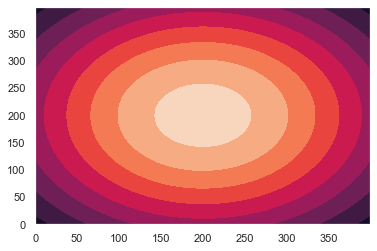

In [8]:
x= np.arange(-1,1,0.005)
y= np.arange(-1,1,0.005).reshape(-1,1)
plt.contourf( np.exp(- (x**2 + y**2)/(2) ))


The image reproduces the contour plot for the Gaussian function. We kow go in search for the best place to put the landmark such that the separation is coherent with the maximum amount of point falling in category one covered by the region that is not in dark purple. That is the Gaussian Kernel


### Different Kernels
There are different Kernel that can be used in order to find the opportune separation

Gaussian $\rightarrow$ RBF $K(x,l^i) = \exp\Big({\frac{||x-l^i||^2}{2 \sigma^2} }\Big)$

Sigmoid $\rightarrow$ $K(x,y)= \tanh(\gamma x^t y +r)$

Polinomial $\rightarrow$ $K(x,y)=(\gamma x^t y + r)^d$

## Non Linear Support Vector Regression

Let a series of data which has a very sparse form and try to apply Linear SVR. The data can be so sparse that the fit is clearly non linear. In this case scenario we can build a non linear SVR.

Non Linear SVR access to a further dimension (such as Kernel SVM). We do exactly what we have done in the kernel case. Lets take a Gaussian kernel (RBF like) and project our points onto the Kernel function. In 3d we can find th plane that better fits the data, and we intersect this plane with the kernel function. and project that curve back on the 2d plane. We have then found the best curve that describes the data

In [9]:
dataset = pd.read_csv('Part 3 - Classification/Section 17 - Kernel SVM/Social_Network_Ads.csv') #name of the dataset
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:,-1].values #modify extrems if necessary

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder = 'passthrough') #column transformer
X = np.array(ct.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)
#possibly different test_size

sc = StandardScaler()
X_train[:,2:] = sc.fit_transform(X_train[:,2:]) #do not apply to dummy variables
X_test[:,2:] = sc.transform(X_test[:,2:])

#train
from sklearn.svm import SVC
SVM_RBF = SVC(kernel='rbf', random_state=0).fit(X_train, y_train)
SVM_POLY = SVC(kernel='poly', random_state=0).fit(X_train, y_train)
SVM_SIGMA = SVC(kernel='sigmoid', random_state=0).fit(X_train, y_train)
results = SVM_RBF.predict(X_test)
confrontation = np.concatenate((y_test.reshape(len(y_test),1), results.reshape(len(results),1)), axis=1)

print('RBF score:',SVM_RBF.score(X_test, y_test))
print('Poly score',SVM_POLY.score(X_test,y_test))
print('Sigmoid Score:', SVM_SIGMA.score(X_test, y_test)) 



RBF score: 0.92
Poly score 0.87
Sigmoid Score: 0.83


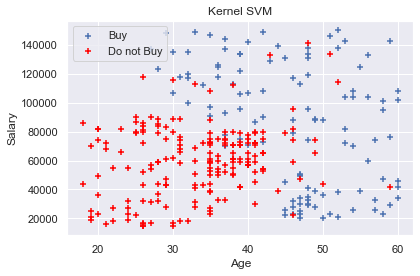

In [10]:
X_graph = sc.inverse_transform(X_train[:,2:])

X_graph = np.concatenate((X_graph,y_train.reshape(-1,1)),axis=1)
X1 =[]
X2 =[]
for i in X_graph:
    if(i[3]==0):
        X2.append(i)
    else:
        X1.append(i)

X1= np.array(X1)
X2= np.array(X2)
plt.scatter(X1[:,1], X1[:,2], marker='+')
plt.scatter(X2[:,1], X2[:,2], c='red', marker='+')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Kernel SVM')
plt.legend(['Buy','Do not Buy'])
plt.tight_layout()
plt.savefig('Part 3 - Classification/Section 17 - Kernel SVM/Kernel-SVM.jpg', dpi=199)

In [11]:
dataset = pd.read_csv('Part 3 - Classification/Section 14 - Logistic Regression/breast_cancer.csv') #name of the dataset
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values #modify extrems if necessary

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:-1])
X[:, 1:-1] = imputer.transform(X[:, 1:-1])


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)

X_train = sc.fit_transform(X_train) #non si applica alle dummy variable
X_test = sc.transform(X_test)

Log_Reg = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
resultsLR = Log_Reg.predict(X_test)

KNN = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
resultsKNN = KNN.predict(X_test)

print('Score LR: ', round(Log_Reg.score(X_test, y_test),4))
print('Score KNN (5):', round(KNN.score(X_test, y_test),4))





Score LR:  0.9474
Score KNN (5): 0.9474
